# NewsVADERPy: News Mood Analysis 
This analysis was run at approximately 6:33 PM PST on 3/6/2018.

- Overall, according to VADER Sentiment, all the news organizations included in the analysis have neutral tweets, as interpreted by VADER Sentiment's recommended interpretation ranges (Positive: 0.5:1, Neutral: 0.5:-0.5, Negative: -0.5:-1).
- At first glance, Breitbart News appears to be the most neutral of all the news sources analyzed. However, upon review of the text of the tweets analyzed, it appears that Breitbart primarily tweets URLs to offsite articles, which likely defeats any attempt to analyze its tweets using VADER.
- The other candidate for the most neutral sentiments, the New York Times, does not appear to be nearly as neutral, at first glance. However, their account has the most neutral average sentiment overall, which seems to indicate that it has a good balance of positive and negative sentiments on their Twitter.
- Overall, as interpreted by VADER Sentiment's recommended ranges (Positive: 0.5:1, Neutral: 0.5:-0.5, Negative: -0.5:-1), all the news organizations fall well within the neutral range.

Opportunities for further investigation could include:
- Longer range analysis
- Analysis excluding tweets that are just URLs
- Looking at correlation between sentiment and Tweet velocity
- Comparing VADER Sentiment analysis with some kind of political bias analysis
- augmenting VADER Sentiment analysis with a custom library of hastags mapped to their sentiment (since it's unlikely that something like #CadetBoneSpurs would properly register as negative)

In [13]:
# ----------------------------------------------------------------------
# Step 1: Import necessary modules and environment
# ----------------------------------------------------------------------

# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# This file contains all Twitter-related actions, so no need to import here
import tweetParser as tp

In [14]:
# ----------------------------------------------------------------------
# Step 2: Call API, get tweets, and parse tweets into a dataframe+CSV
# ----------------------------------------------------------------------

# create list of target news organizations' Twitter handles
targetNewsOrg_list = ["BBC", "FoxNews", "nytimes", "BreitbartNews",
                      "CBSNews", "USATODAY"]

# create and set color palette for all charts
orgPalette = sns.color_palette("bright", len(targetNewsOrg_list))
sns.set_palette(orgPalette)

# define number of tweets we want to pull from each org
numTweets = 150

# break into increments of 10
numCycles = int(round(numTweets/10))

# create dict to store dictionaries generated during analysis
completeResults_df = tp.parseTweets(targetNewsOrg_list, numCycles)

# rearrange columns to be more sensible
completeResults_df = completeResults_df[["handle", "count", "compound",
                                         "positive", "negative", "neutral",
                                         "date", "text"]]
completeResults_df.to_csv("TweetsAnalyzed.csv")

completeResults_df.head()

,handle,count,compound,positive,negative,neutral,date,text
0,BBC,1,0.0000,0.000,0.000,1.000,1.520393e+09,"😂🙊 Who has a filthier mouth, Jennifer Lawrence..."
1,BBC,2,-0.4215,0.000,0.219,0.781,1.520390e+09,A diver swims through a thick soup of plastic ...
2,BBC,3,0.4939,0.127,0.000,0.873,1.520388e+09,"Every day around the UK, an army of unpaid vol..."
3,BBC,4,-0.1027,0.165,0.185,0.650,1.520386e+09,Impressive and terrifying in equal measure. \n...
4,BBC,5,0.0000,0.000,0.000,1.000,1.520386e+09,RT @bbcwritersroom: New #Brexit #comedy Soft B...


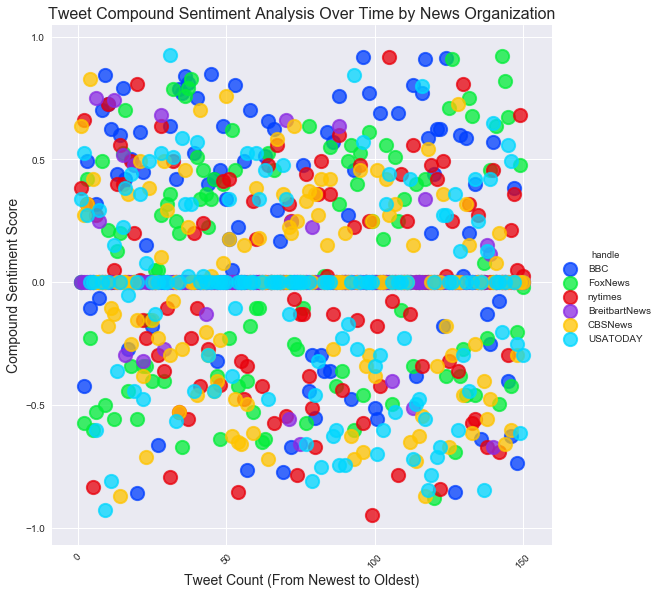

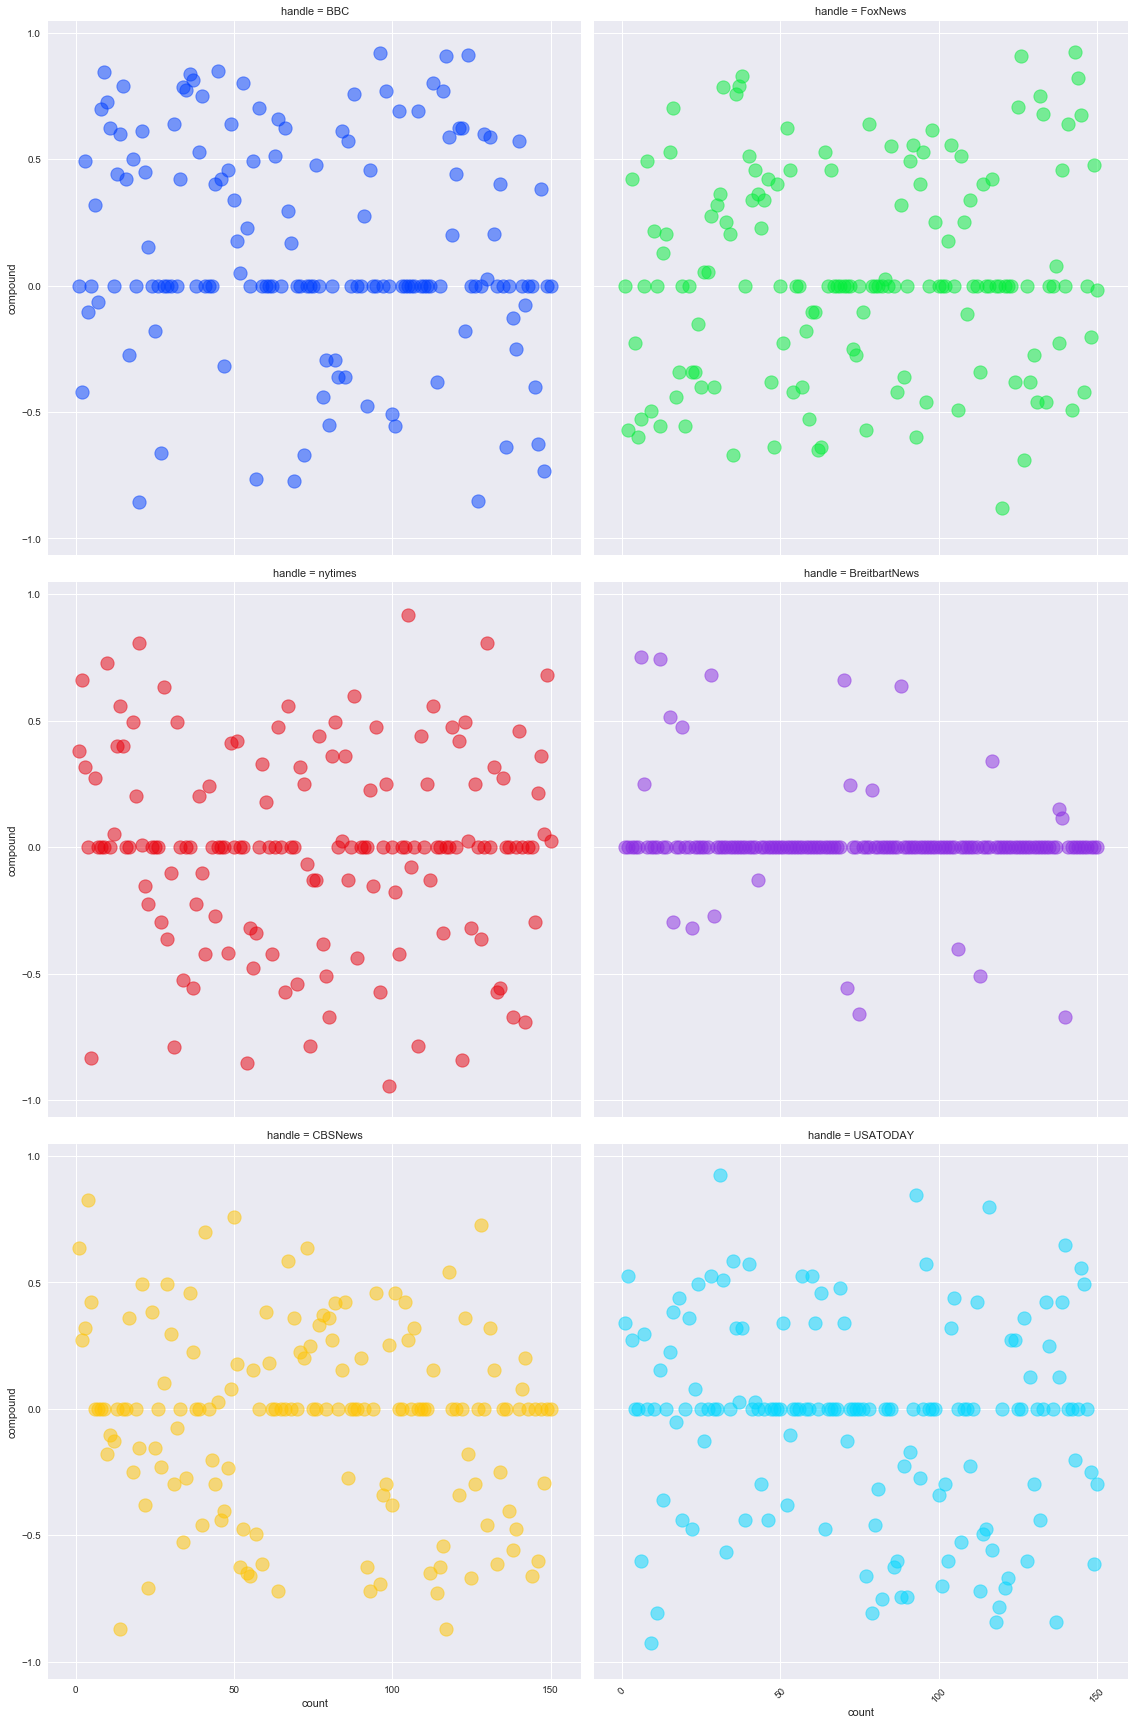

In [15]:
# ----------------------------------------------------------------------
# Step 3: Generate first plot: scatterplot of last 100 tweets showing 
# compound sentiment and sorted by relative timestamp
# ----------------------------------------------------------------------
#set style to be seaborn
sns.set()

# generate overall plot
compoundSentByTime_plot = sns.lmplot(x="count", y="compound", 
                                data=completeResults_df, 
                                palette=orgPalette, hue='handle',
                                fit_reg=False, legend=True, size=8, 
                                scatter_kws={'s':175, 'alpha':0.75,
                                             'edgecolors':'face', 
                                             'linewidths':2})
plt.xlabel("Tweet Count (From Newest to Oldest)",size=14)
plt.ylabel("Compound Sentiment Score", size=14)
plt.title("Tweet Compound Sentiment Analysis Over Time by News Organization", 
          size=16)
plt.locator_params(nbins=5)
plt.xticks(rotation=45)
plt.savefig("CompoundSentimentAnalysis_Scatterplot.png")

#generate subplots
orgPalette = sns.color_palette("bright", len(targetNewsOrg_list))
compoundSentByTime_subplots = sns.lmplot(x="count", y="compound", 
                                data=completeResults_df, 
                                col="handle", col_wrap = 2,
                                palette=orgPalette, hue='handle',
                                fit_reg=False, legend=True, size=8,
                                scatter_kws={'s':175, 'alpha':0.5,
                                             'edgecolors':'face', 
                                             'linewidths':1})
plt.savefig("CompoundSentimentAnalysis_Subplots.png")


plt.locator_params(nbins=5)
plt.xticks(rotation=45)
plt.show(compoundSentByTime_plot)
plt.show(compoundSentByTime_subplots)

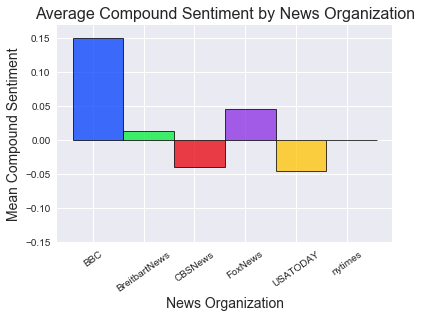

In [16]:
# ----------------------------------------------------------------------
# Step 4: Generate second plot: bar plot showing overall compound 
# sentiment in the last 100 tweets
# ----------------------------------------------------------------------

# generate dataframe
meanCompoundSent_df = pd.DataFrame(completeResults_df.groupby("handle").mean()["compound"])
meanCompoundSent_df.reset_index(level=0, inplace=True)

# generate x + y
x_axis = np.arange(len(targetNewsOrg_list))
y_axis = meanCompoundSent_df["compound"]

# create bar plot
plt.bar(x_axis, y_axis, color=orgPalette, width=1, align='edge', 
        alpha=0.75, linewidth=1, edgecolor='black')
tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations, meanCompoundSent_df['handle'], rotation=35)
plt.xlabel('News Organization', size=14)
plt.ylabel('Mean Compound Sentiment', size=14)
plt.ylim(-0.15, 0.17)
plt.title('Average Compound Sentiment by News Organization', size=16)
plt.savefig("avgCompoundSentimentBarchart.png")
plt.show()